In [1]:
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

In [2]:
import os
from bertopic import BERTopic
from docx import Document
import numpy as np
import pandas as pd
from nltk.stem import WordNetLemmatizer
import gensim

## **Choosing the folder/subject**

In [3]:
os.chdir("../theory/DBMS")

## **Importing Models**

In [4]:
model_len_2 = BERTopic.load("model_cpu")

In [5]:
model_ngram = BERTopic.load("model_ngram_len_2")

In [6]:
model_corr = BERTopic.load("model_corr_ngram_len_2")

## **Getting Acronyms**

In [7]:
acronym_len_2 = {}
tp = model_len_2.get_topic_info()
for i in range(len(tp['Topic'])):
    print(tp['Topic'].iloc[i], '  :  ', tp['Count'].iloc[i], "  :  ", tp['Name'].iloc[i])
    acronym_len_2[tp['Topic'].iloc[i]] = tp['Name'].iloc[i].split(str(tp['Topic'].iloc[i])+'_')[1].split('_')[0] + '_' + str(tp['Topic'].iloc[i])


-1   :   4858   :   -1_attribute_relation_employee_database
0   :   292   :   0_diagram_uml_notation_rose
1   :   268   :   1_index_field_block_file
2   :   203   :   2_dbms_software_application_ibm
3   :   186   :   3_relationship_entity_binary_ratio
4   :   185   :   4_jdbc_sql_embedded_program
5   :   177   :   5_temporal_time_valid_date
6   :   174   :   6_optimization_query_cost_optimizer
7   :   153   :   7_subclass_superclass_specialization_category
8   :   144   :   8_warehouse_olap_warehousing_data
9   :   140   :   9_english_joyce_alice_reltwo
10   :   136   :   10_bucket_hashing_hash_overflow
11   :   136   :   11_xsd_xml_element_document
12   :   128   :   12_book_library_title_discussion
13   :   127   :   13_node_tree_leaf_pointer
14   :   125   :   14_predicate_datalog_interpretation_fact
15   :   122   :   15_lock_locked_item_locking
16   :   120   :   16_schema_conceptual_external_independence
17   :   117   :   17_key_primary_foreign_candidate
18   :   105   :   18_tr

In [8]:
acronym_ngram = {}
tp = model_ngram.get_topic_info()
for i in range(len(tp['Topic'])):
    print(tp['Topic'].iloc[i], '  :  ', tp['Count'].iloc[i], "  :  ", tp['Name'].iloc[i])
    acronym_ngram[tp['Topic'].iloc[i]] = tp['Name'].iloc[i].split(str(tp['Topic'].iloc[i])+'_')[1].split('_')[0] + '_' + str(tp['Topic'].iloc[i])


-1   :   5105   :   -1_database_attribute_figure_value
0   :   277   :   0_document_search_retrieval_web
1   :   188   :   1_time_temporal_valid_temporal database
2   :   182   :   2_dbms_software_application_database
3   :   176   :   3_subclass_specialization_superclass_entity
4   :   148   :   4_relationship_relationship type_entity_entity type
5   :   143   :   5_relone_english_joyce_alice
6   :   141   :   6_xsd_xml_element_xsd element
7   :   139   :   7_warehouse_data warehouse_data_data warehousing
8   :   135   :   8_lock_item_locking_locked
9   :   121   :   9_schema_conceptual_conceptual schema_design
10   :   120   :   10_node_tree_leaf_leaf node
11   :   117   :   11_spatial_spatial data_spatial database_spatial join
12   :   114   :   12_book_discussion_title_bibliography
13   :   109   :   13_bucket_hashing_hash_hash value
14   :   108   :   14_query_optimization_query optimization_query processing
15   :   104   :   15_rule_trigger_event_active
16   :   103   :   16_key

In [9]:
acronym_corr = {}
tp = model_corr.get_topic_info()
for i in range(len(tp['Topic'])):
    print(tp['Topic'].iloc[i], '  :  ', tp['Count'].iloc[i], "  :  ", tp['Name'].iloc[i])
    acronym_corr[tp['Topic'].iloc[i]] = tp['Name'].iloc[i].split(str(tp['Topic'].iloc[i])+'_')[1].split('_')[0] + '_' + str(tp['Topic'].iloc[i])


-1   :   4899   :   -1_database_relation_attribute_employee
0   :   291   :   0_index_file_block_field
1   :   188   :   1_query_optimization_cost_query optimization
2   :   184   :   2_relationship_relationship type_entity_binary relationship
3   :   165   :   3_dbms_software_application_database
4   :   163   :   4_time_temporal_valid_temporal database
5   :   155   :   5_itemsets_frequent_association_juice
6   :   142   :   6_course_student_grade_semester
7   :   140   :   7_subclass_superclass_specialization_generalization
8   :   137   :   8_xsd_xml_element_xsd element
9   :   134   :   9_schema_conceptual schema_conceptual_external schema
10   :   133   :   10_english_joyce_alice_ramesh english joyce
11   :   130   :   11_predicate_rule_datalog_interpretation
12   :   128   :   12_warehouse_data warehouse_data_data warehousing
13   :   124   :   13_book_library_discussion_title
14   :   121   :   14_bucket_hashing_hash_record
15   :   121   :   15_lock_item_locked_lock item
16   

## **Getting the Questions**

In [10]:
def ls(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

# Tokenize and lemmatize
def pp(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 1:         # for networking > 1
            result.append(ls(token))
    result = ' '.join(result)
    return result

In [11]:
def get_ques_list():
    list_of_files = os.listdir()
    all_ques = []
    for filename in list_of_files:
        if(filename[len(filename)-5:] == '.docx'):
            doc = Document(filename)
            # print(filename)
            # print(doc)

            fullText = []
            for para in doc.paragraphs:
                # print(para.text)
                fullText.append(para.text)
            # doctxt =  '\n'.join(fullText)
            doctxt = fullText
            fullText = []
            for eachl in doctxt:
                # print(eachl)
                if len(eachl) == 0:
                    continue
                elif eachl[0] == 'Q':
                    fullText.append(eachl.split(" ", 1)[1])   # for networking "." -> " "
                else:
                    fullText[len(fullText)-1] = fullText[len(fullText)-1] + ' ' + eachl

            all_ques.extend(fullText)
            # all_ques = all_ques + fullText
            # print(doctxt)
            # print(fullText)
    return all_ques

In [12]:
ques_list = get_ques_list()
ques_list = [pp(ques) for ques in ques_list]   # for preprocessing question
for ques in ques_list:
    print(ques)

dbms
database
mention issue traditional file base systems dbms better choice
explain advantage dbms
explain different languages present dbms
mean acid properties dbms
null value database blank space zero
super primary candidate foreign key
difference primary key unique constraints
mean dbms utility explain rdbms examples
checkpoint dbms
database
mean data model
checkpoint occur dbms
difference entity attribute
kinds interactions cater dbms
understand query optimization
consider null value blank space zero
understand aggregation atomicity
different level abstraction dbms
entity relationship model
understand term entity entity type entity set dbms
mean transparent dbms
unary operations relational algebra
rdbms
differnt data model
define relation schema relation
degree relation
relationship
disadvantage file process systems
explain different type join sql
primary key sql
constraints
difference delete truncate statements sql
query optimization
give table select departments employees rank a

## **Predicting Topic using different model**

In [13]:
len_2_probab = []
len_2_topic = []

ngram_probab = []
ngram_topic = []

corr_probab = []
corr_topic = []

for ques in ques_list:
    number_of_topics = 1
    similar_topic, probab = model_len_2.find_topics(ques, top_n=number_of_topics)
    len_2_probab.append(round(probab[0], 2))
    len_2_topic.append(acronym_len_2[similar_topic[0]])
    
    similar_topic, probab = model_ngram.find_topics(ques, top_n=number_of_topics)
    ngram_probab.append(round(probab[0], 2))
    ngram_topic.append(acronym_ngram[similar_topic[0]])
    
    similar_topic, probab = model_corr.find_topics(ques, top_n=number_of_topics)
    corr_probab.append(round(probab[0], 2))
    corr_topic.append(acronym_corr[similar_topic[0]])

# print(len(len_2_probab))
# print(len(len_2_topic))
# print()
# print(len(ngram_probab))
# print(len(ngram_topic))
# print()
# print(len(corr_probab))
# print(len(corr_topic))

## **Storing in CSV**

In [14]:
os.chdir("..")
os.chdir("..")
os.chdir("compare_model/compare_graph")

In [15]:
data = {
    'question': ques_list,
    'len_2_probab': len_2_probab,
    'len_2_topic': len_2_topic,
    'ngram_probab': ngram_probab,
    'ngram_topic': ngram_topic,
    'corr_probab': corr_probab,
    'corr_topic': corr_topic
}

In [16]:
df = pd.DataFrame.from_dict(data)

In [17]:
df.to_csv('dbms_compare.csv', index=False)

## **Extracting from CSV**

In [18]:
df = pd.read_csv('dbms_compare.csv')

In [19]:
'''Appending the average in the last'''
avg_len_2_probab = round(sum(len_2_probab) / len(len_2_probab), 2)
avg_ngram_probab = round(sum(ngram_probab) / len(ngram_probab), 2)
avg_corr_probab = round(sum(corr_probab) / len(corr_probab), 2)

# len_2_probab = pd.concat([len_2_probab, pd.Series([avg_len_2_probab])])
# ngram_probab = pd.concat([ngram_probab, pd.Series([avg_ngram_probab])])
# corr_probab = pd.concat([corr_probab, pd.Series([avg_corr_probab])])

# len_2_topic = pd.concat([len_2_topic, pd.Series(["average"])])
# ngram_topic = pd.concat([ngram_topic, pd.Series(["average"])])
# corr_topic = pd.concat([corr_topic, pd.Series(["average"])])

# ques_list = pd.concat([ques_list, pd.Series(["average"])])

average = ['average', avg_len_2_probab, 'average', avg_ngram_probab, 'average', avg_corr_probab, 'average']
df.loc[len(df)] = average

print(len(len_2_topic), " ", len(len_2_probab))
print(len(ngram_topic), " ", len(ngram_probab))
print(len(corr_topic), " ", len(corr_probab))
print(len(ques_list))

42   42
42   42
42   42
42


In [20]:
ques_list = df['question']

len_2_probab = df['len_2_probab']
len_2_topic = df['len_2_topic']

ngram_probab = df['ngram_probab']
ngram_topic = df['ngram_topic']

corr_probab = df['corr_probab']
corr_topic = df['corr_topic']

In [21]:
print(len(len_2_probab))
print(len(len_2_topic))
print()
print(len(ngram_probab))
print(len(ngram_topic))
print()
print(len(corr_probab))
print(len(corr_topic))
print()

print(type(ques_list))
print(ques_list)

43
43

43
43

43
43

<class 'pandas.core.series.Series'>
0                                                  dbms
1                                              database
2     mention issue traditional file base systems db...
3                                explain advantage dbms
4              explain different languages present dbms
5                             mean acid properties dbms
6                  null value database blank space zero
7                   super primary candidate foreign key
8             difference primary key unique constraints
9              mean dbms utility explain rdbms examples
10                                      checkpoint dbms
11                                             database
12                                      mean data model
13                                checkpoint occur dbms
14                          difference entity attribute
15                        kinds interactions cater dbms
16                        understand query opti

## **Graph Compare**

In [22]:
import numpy as np
import matplotlib.pyplot as plt

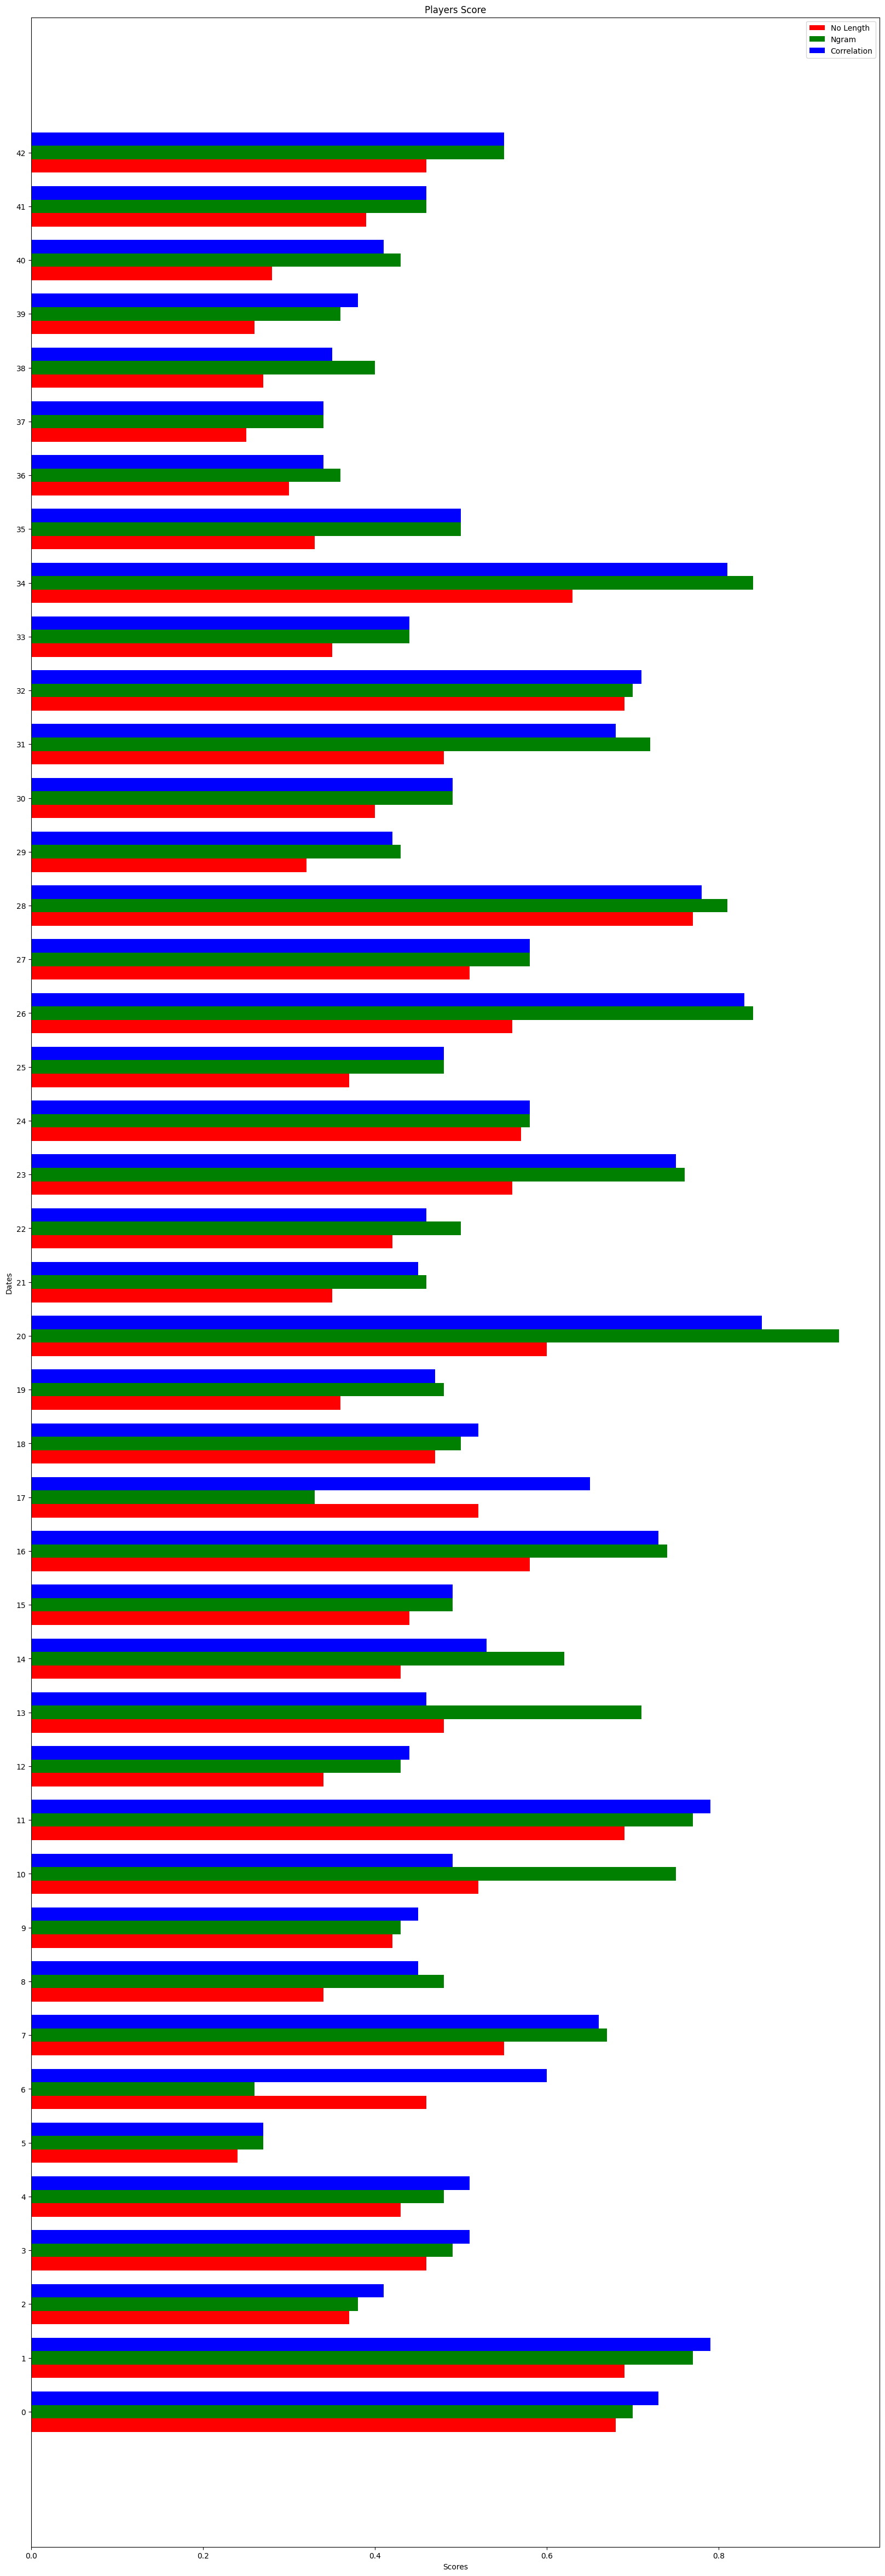

In [23]:

ind = np.arange(len(ques_list))
width = 0.25

fig = plt.figure(figsize=(20, 60))

bar1 = plt.barh(ind, len_2_probab, width, color='r')

bar2 = plt.barh(ind+width, ngram_probab, width, color='g')

bar3 = plt.barh(ind+width*2, corr_probab, width, color='b')


plt.ylabel("Question Number")
plt.xlabel('Prediction')
plt.title("Comaprison of Models")

plt.yticks(ind+width, [i for i in range(len(ques_list))])
# plt.yticks(ind+width, ques_list)
plt.legend((bar1, bar2, bar3), ('No Length', 'Ngram', 'Correlation'))
plt.show()


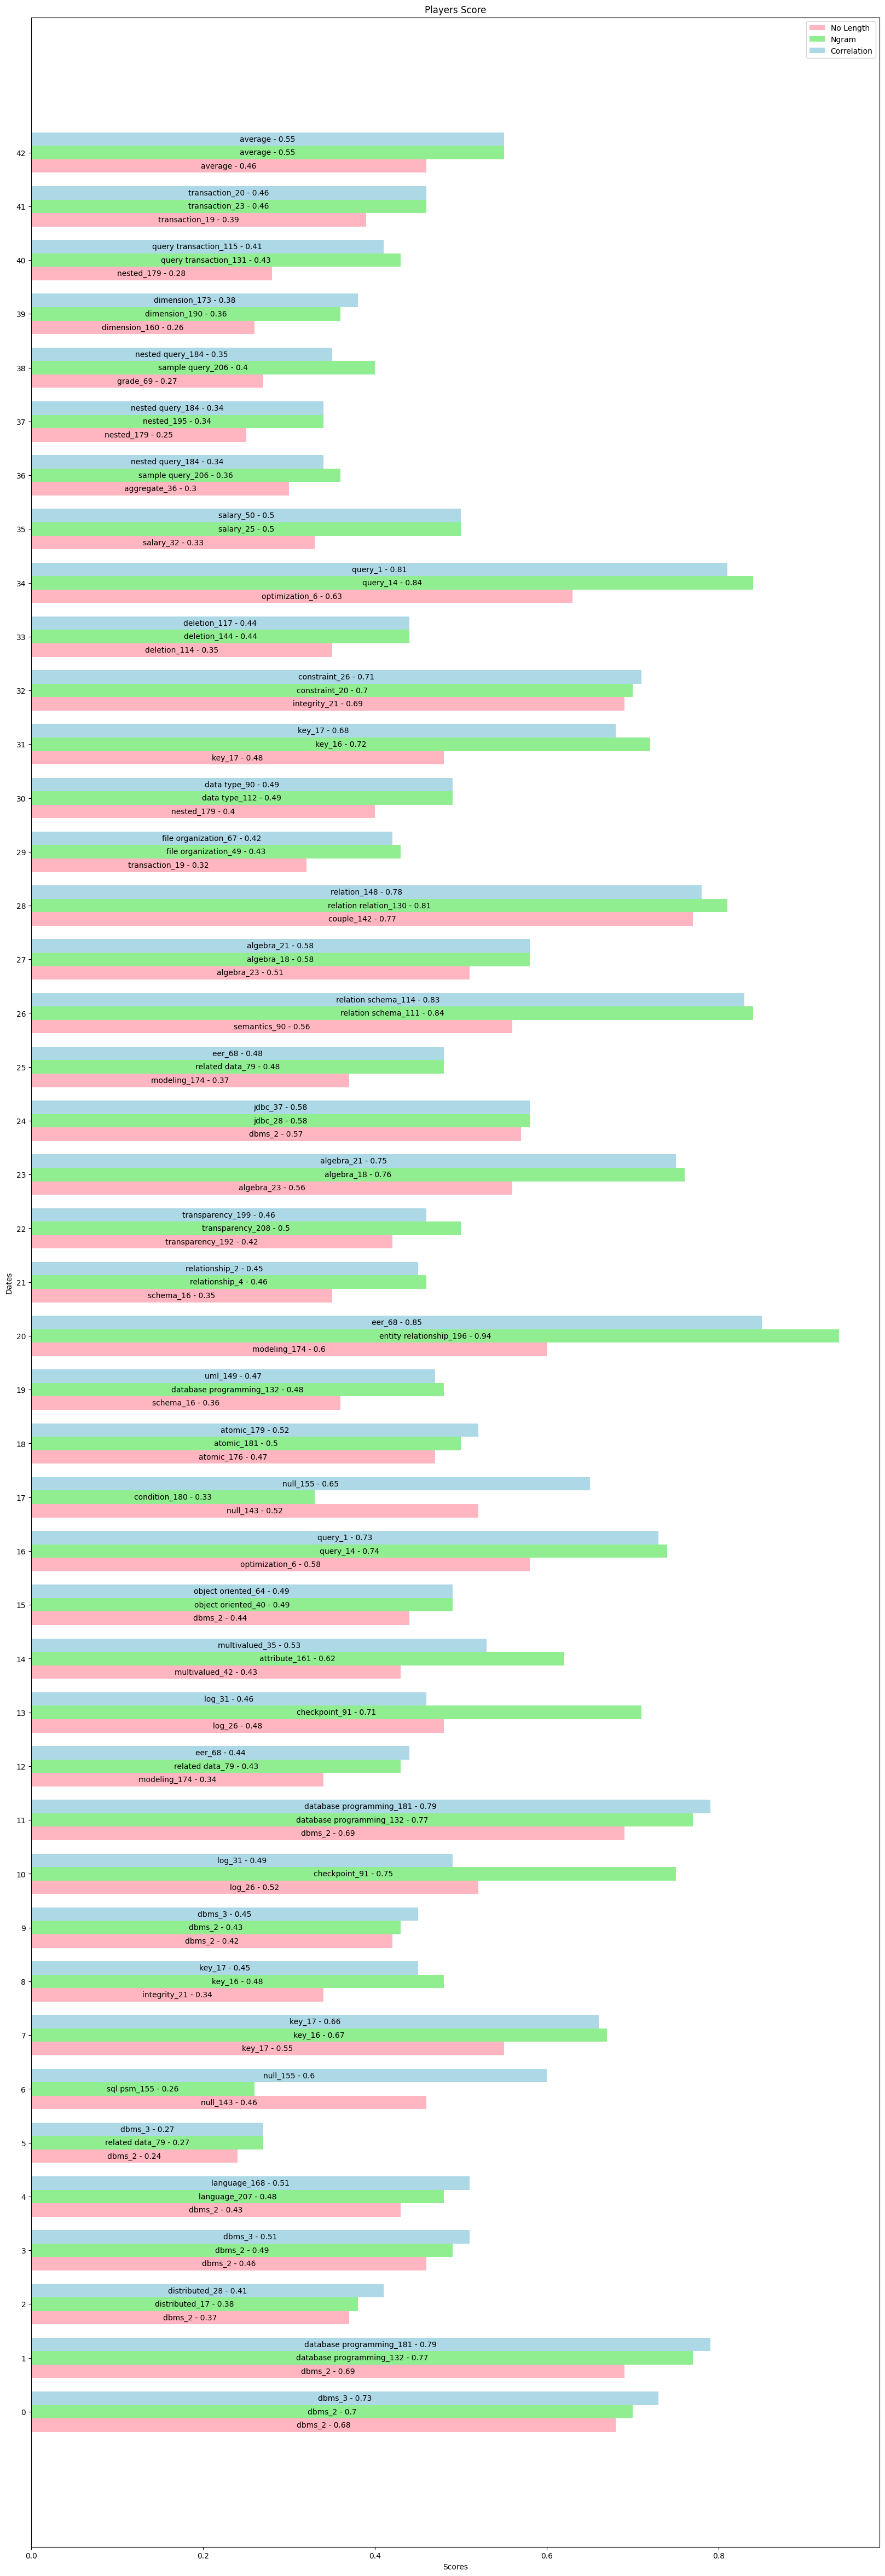

In [24]:

ind = np.arange(len(ques_list))
width = 0.25

fig = plt.figure(figsize=(20, 60))

inside_bar1 = [str(len_2_topic[i]) + " - " + str(len_2_probab[i]) for i in range(len(ques_list))]
bar1 = plt.barh(ind, len_2_probab, width, color='#FFB6C1')
plt.bar_label(bar1, inside_bar1, label_type='center')

inside_bar2 = [str(ngram_topic[i]) + " - " + str(ngram_probab[i]) for i in range(len(ques_list))]
bar2 = plt.barh(ind+width, ngram_probab, width, color='#90EE90')
plt.bar_label(bar2, inside_bar2, label_type='center')

inside_bar3 = [str(corr_topic[i]) + " - " + str(corr_probab[i]) for i in range(len(ques_list))]
bar3 = plt.barh(ind+width*2, corr_probab, width, color='#ADD8E6')
plt.bar_label(bar3, inside_bar3, label_type='center')


plt.ylabel("Question Number")
plt.xlabel('Prediction')
plt.title("Comaprison of Models")

plt.yticks(ind+width, [i for i in range(len(ques_list))])
# plt.yticks(ind+width, ques_list)

plt.legend((bar1, bar2, bar3), ('No Length', 'Ngram', 'Correlation'))
plt.show()

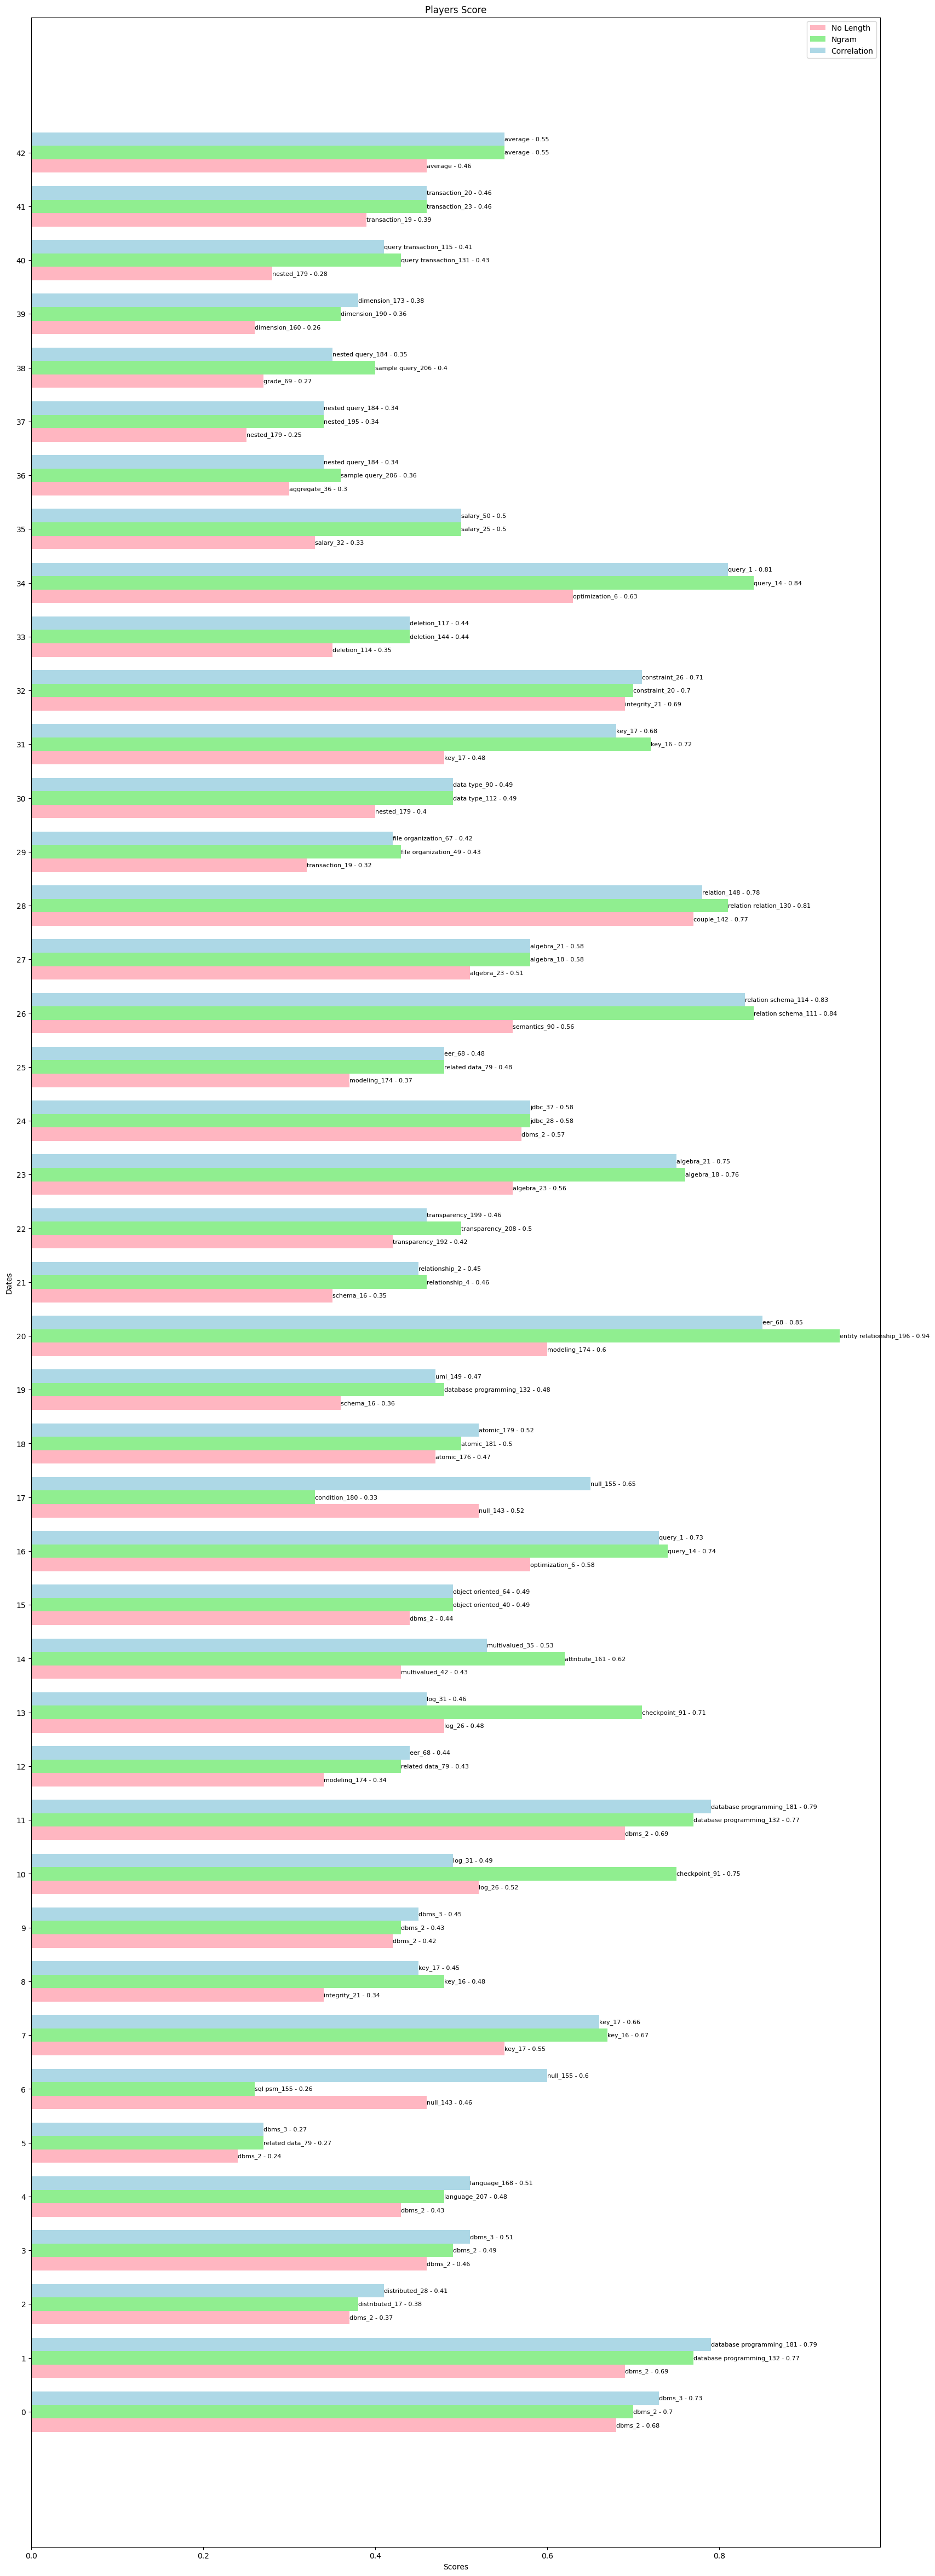

In [25]:

ind = np.arange(len(ques_list))
width = 0.25

fig = plt.figure(figsize=(20, 60))

bar1 = plt.barh(ind, len_2_probab, width, color='#FFB6C1')

bar2 = plt.barh(ind+width, ngram_probab, width, color='#90EE90')

bar3 = plt.barh(ind+width*2, corr_probab, width, color='#ADD8E6')


plt.ylabel("Question Number")
plt.xlabel('Prediction')
plt.title("Comaprison of Models")

plt.yticks(ind+width, [i for i in range(len(ques_list))])
# plt.yticks(ind+width, ques_list)

for i, bar in enumerate(bar1):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(len_2_topic[i]) + " - " + str(len_2_probab[i]),
             ha='left', va='center', color='black', fontsize=8)
for i, bar in enumerate(bar2):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(ngram_topic[i]) + " - " + str(ngram_probab[i]),
             ha='left', va='center', color='black', fontsize=8)
for i, bar in enumerate(bar3):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(corr_topic[i]) + " - " + str(corr_probab[i]),
             ha='left', va='center', color='black', fontsize=8)

plt.legend((bar1, bar2, bar3), ('No Length', 'Ngram', 'Correlation'))
plt.show()